In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [66]:

# Load the dataset
df = pd.read_csv('penguins.csv')

# Inspect the first few rows of the dataset
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [67]:
# Check for missing values
print(df.isnull().sum())  

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [68]:
# Encode the 'sex' column
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [69]:
df['sex'] = df['sex'].map({'MALE': 1, 'FEMALE': 0})

In [70]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [76]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)


In [75]:
# Inspect the standardized features
features_scaled[:5]

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801,  0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747, -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343, -1.00604235],
       [-1.34473838,  1.09690132, -0.5691051 , -0.93955126, -1.00604235],
       [-0.86716981,  1.76107445, -0.78316427, -0.6911491 ,  0.99399394]])

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

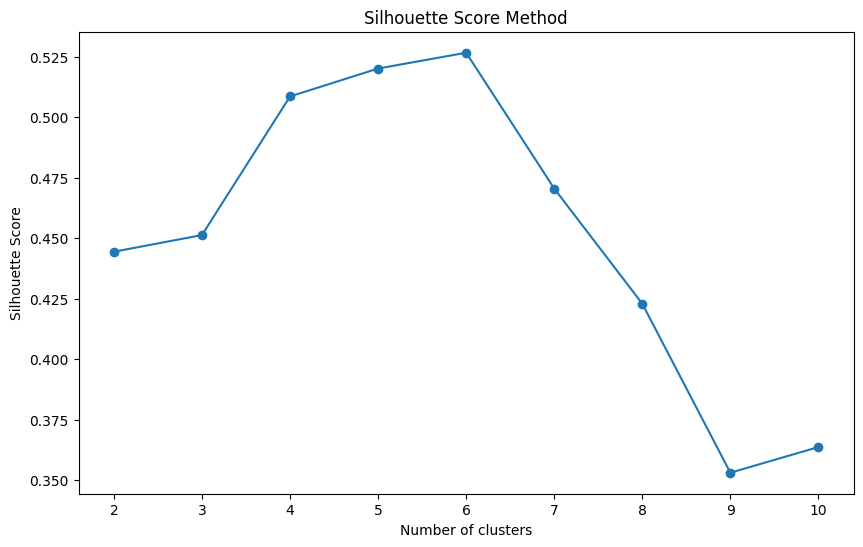

In [77]:

# Determine the optimal number of clusters using Silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    silhouette_scores.append(silhouette_score(features_scaled, labels))

# Plot the Silhouette score graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [79]:
# Perform clustering with the optimal number of clusters
optimal_clusters = 5

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(features_scaled)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [88]:
print(labels)

[4 2 2 2 4 2 4 2 4 2 2 4 2 0 2 4 2 4 4 2 4 2 2 4 2 4 2 4 2 4 4 2 2 4 2 4 2
 4 2 4 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2 4 2
 4 2 4 2 4 4 2 4 2 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 4 2 2 4 2 4 2 0 0
 2 0 2 2 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 0 2 2 0 2 0
 0 2 0 2 0 0 2 0 0 2 2 0 2 0 2 0 2 0 0 2 0 2 2 0 2 0 0 0 1 3 1 3 3 1 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 3 1 1 3 1 3 3 1 3 3 1 1 3 1 3 1 3 1 3 1 3 1 3 3 1 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 3 1 3 1 3 3 1 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 3 1 1 3 1 3 1 3 3 1 3 1 3 1 3 1 3 1 3 3 1 1 3 1 3]


In [83]:
# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_scaled)


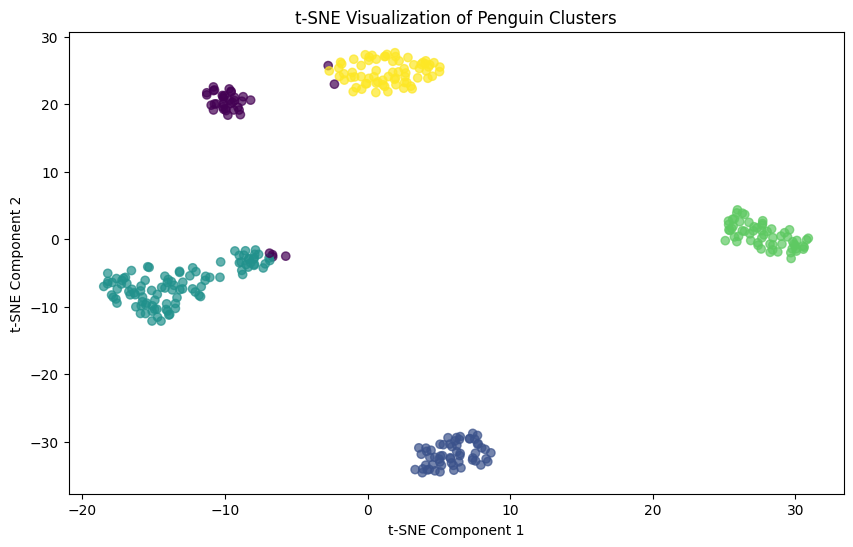

In [94]:
# Plot the t-SNE results with cluster colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7)

# Add legend based on unique cluster labels
plt.title('t-SNE Visualization of Penguin Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
